## DATA ANALYSIS' PROJECT
# <font color = orange> 🚀 **__RICK & MORTY__** 🚀

> ### SUMMARY:
> 1. Getting started: connection to the API and getting a first working DF.
> 2. Preliminary EDA
> 3. 

### Libraries

In [54]:
import pandas as pd
import numpy as  np
import requests

import sys 
import pyjsonviewer
import seaborn as sns 
import matplotlib.pyplot as plt 

#import mysql.connector 

## {1} 🛸 Getting started:
__RICK AND MORTY API__
- Call to the API and transformation to json
- Extraction of character's data
- Creation of a dataframe for the first url (page 1) and concatenation of following pages 


In [55]:
json = requests.get("https://rickandmortyapi.com/api/character").json()
df = pd.DataFrame(json["results"])

In [56]:
page = 2
while page < 43:
    json2 = requests.get("https://rickandmortyapi.com/api/character/?page="+str(page)).json()
    df_n = pd.DataFrame(json2['results'])
    df = pd.concat([df, df_n])
    page += 1

In [57]:
df.reset_index(inplace=True)
df.drop(columns="index", inplace = True)
df.head()

,id,name,status,species,type,gender,origin,location,image,episode,url,created
0,1,Rick Sanchez,Alive,Human,,Male,"{'name': 'Earth (C-137)', 'url': 'https://rick...","{'name': 'Citadel of Ricks', 'url': 'https://r...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/1, ht...",https://rickandmortyapi.com/api/character/1,2017-11-04T18:48:46.250Z
1,2,Morty Smith,Alive,Human,,Male,"{'name': 'unknown', 'url': ''}","{'name': 'Citadel of Ricks', 'url': 'https://r...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/1, ht...",https://rickandmortyapi.com/api/character/2,2017-11-04T18:50:21.651Z
2,3,Summer Smith,Alive,Human,,Female,"{'name': 'Earth (Replacement Dimension)', 'url...","{'name': 'Earth (Replacement Dimension)', 'url...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/3,2017-11-04T19:09:56.428Z
3,4,Beth Smith,Alive,Human,,Female,"{'name': 'Earth (Replacement Dimension)', 'url...","{'name': 'Earth (Replacement Dimension)', 'url...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/4,2017-11-04T19:22:43.665Z
4,5,Jerry Smith,Alive,Human,,Male,"{'name': 'Earth (Replacement Dimension)', 'url...","{'name': 'Earth (Replacement Dimension)', 'url...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/5,2017-11-04T19:26:56.301Z


- Unpacking of dictonary-type columns "origin" and "location"

In [58]:
def get_origin(col, item):
    origins_list = []
    for key, value in col.items():
        for key2, value2, in value.items():
            if key2 == item:
                origins_list.append(value2)
            else:
                pass
    return origins_list      

    - ["origin_name"]

In [59]:
origin_list = get_origin(col = df["origin"], item = "name")
df["origin_name"] = pd.DataFrame(origin_list)

    - ["origin_url"]

In [60]:
origin_url = get_origin(col = df["origin"], item = "url")
df["origin_url"] = pd.DataFrame(origin_url)

    - ["location_name"]

In [61]:
location_list = get_origin(col = df["location"], item = "name")
df["location_name"] = pd.DataFrame(location_list)

    - ["location_url"]

In [62]:
location_url = get_origin(col = df["location"], item = "url")
df["location_url"] = pd.DataFrame(location_url)

    - Drop "origin" and "location" dict-type cols after they are unpacked!

In [63]:
df = df.drop(columns = ["origin", "location"], axis = 1)
df.head(2)

    - For easier reading: reordering columns

In [72]:
reord_columns = ['id', 'name',  'gender', 'status', 'species', 'type','origin_name', 'location_name', 'episode',
       'url', 'image','created', 'origin_url', 'location_url']

df = df.reindex(columns = reord_columns)





------
## {2} 🛸 Preliminary Exploratory Data Analysis (EDA):

In [105]:
print("The dataframe, at this moment, contains", df.shape[0], "rows and", df.shape[1], "columns.")

The dataframe, at this moment, contains 826 rows and 14 columns.


In [106]:
df.columns

Index(['id', 'name', 'gender', 'status', 'species', 'type', 'origin_name',
       'location_name', 'episode', 'url', 'image', 'created', 'origin_url',
       'location_url'],
      dtype='object')

Info in the columns:

In [115]:
print("1. ID: The id is a unique number assigned to each of the registers (we may probably drop this column soon as it seems to work as an index).", "\n\n",
       "2. NAME: The amount of unique names registered is", len(df["name"].value_counts()),"\n\n",
       "3. GENDER: These are the genders assigned to the characters:", "\n", df["gender"].value_counts(), "\n\n",
       "4. STATUS: This variable informs about whether the character is alive or not. Being:" , "\n", df["status"].value_counts(), "\n\n"
       "5. SPECIES: These are the different species registered:", "\n", df["species"].value_counts())
    

1. ID: The id is a unique number assigned to each of the registers (we may probably drop this column soon as it seems to work as an index). 

 2. NAME: The amount of unique names registered is 757 

 3. GENDER: These are the genders assigned to the characters: 
 Male          610
Female        148
unknown        49
Genderless     19
Name: gender, dtype: int64 

 4. STATUS: This variable informs about whether the character is alive or not. Being: 
 Alive      439
Dead       287
unknown    100
Name: status, dtype: int64 

5. SPECIES: These are the different species registered: 
 Human                    366
Alien                    205
Humanoid                  68
Animal                    55
Robot                     51
Mythological Creature     46
unknown                   13
Poopybutthole              8
Cronenberg                 8
Disease                    6
Name: species, dtype: int64


In [113]:
   print("6. TYPE: These are the different types registered:", "\n", df["type"].value_counts(), ".\n\n",
       "7. ORIGIN_NAME: These are the different origins (planets) registered:", "\n", df["origin_name"].value_counts(), ".\n\n",
       "8. LOCATION_NAME: These are the different current locations (planets) registered:", "\n", df["location_name"].value_counts(), ".\n\n"
       "9. EPISODE: For each row there's a list of the different episodes where the character appears.", "\n\n"
       "10. CREATION: Date when the character was added to the API.", "\n\n"
       "URLS: [character / image / origin_url / location_url], ¡we'll use them for visualization purposes at the end of this ETL!",  "\n\n")


6. TYPE: These are the different types registered: 
                           401
Soulless Puppet            46
Decoy                      26
Parasite                   19
Snake                      14
                         ... 
Boobie buyer reptilian      1
Human Gazorpian             1
Sentient ant colony         1
Alligator-Person            1
Passing Butter Robot        1
Name: type, Length: 170, dtype: int64 .

 7. ORIGIN_NAME: These are the different origins (planets) registered: 
 unknown                          300
Earth (Replacement Dimension)    155
Earth (C-137)                     33
Story Train                       29
Interdimensional Cable            16
                                ... 
Plopstar                           1
Earth (Tusk Dimension)             1
Plitzville Montana                 1
Girvonesk                          1
Hamster in Butt World              1
Name: origin_name, Length: 97, dtype: int64 .

 8. LOCATION_NAME: These are the different curren

Checking Nulls & Dtypes:
- There are not null values in the dataset, which is nice!
- The only column with numerical values is the ID... this may lead us to take a very categorical analysis...

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826 entries, 0 to 825
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             826 non-null    int64 
 1   name           826 non-null    object
 2   gender         826 non-null    object
 3   status         826 non-null    object
 4   species        826 non-null    object
 5   type           826 non-null    object
 6   origin_name    826 non-null    object
 7   location_name  826 non-null    object
 8   episode        826 non-null    object
 9   url            826 non-null    object
 10  image          826 non-null    object
 11  created        826 non-null    object
 12  origin_url     826 non-null    object
 13  location_url   826 non-null    object
dtypes: int64(1), object(13)
memory usage: 90.5+ KB


In [120]:
df.describe(include = object).T

,count,unique,top,freq
name,826,757,Cirque du Soleil Zumanity Member,5
gender,826,4,Male,610
status,826,3,Alive,439
species,826,10,Human,366
type,826,170,,401
origin_name,826,97,unknown,300
location_name,826,95,Earth (Replacement Dimension),230
episode,826,130,[https://rickandmortyapi.com/api/episode/28],51
url,826,826,https://rickandmortyapi.com/api/character/1,1
image,826,826,https://rickandmortyapi.com/api/character/avat...,1


------
## {3} 🛸 Visualizing the variables:

As the variables are categorical and most of them have multiple categories, we'll just check:
- Status
- Species

With the hue based on the gender.

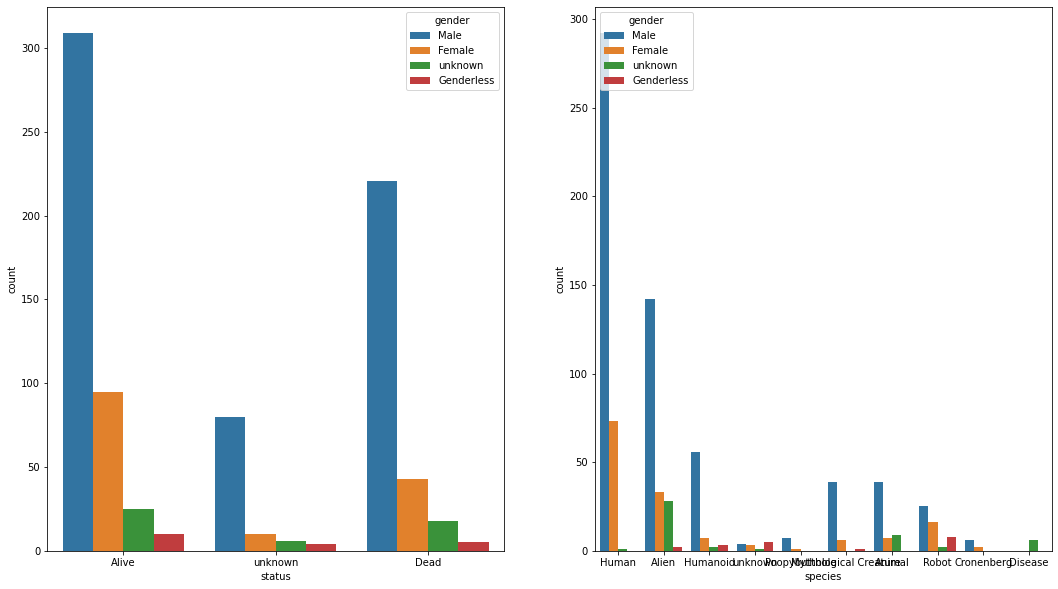

In [160]:
fig, ax = plt.subplots(1, 2, figsize= (18, 10))
ax = ax.flatten()
i = 0
for i, column in enumerate(df[['status', 'species']].columns):
    sns.countplot(data=df, x = column, ax = ax[i],hue="gender")

   

